In [62]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

%matplotlib inline
pd.set_option('display.max_columns', None)

## Data Import

In [91]:
# Load the first 200,000 features
gdf = gpd.read_file("./epc_dom.geojson", rows=30_000)

# Now randomly sample 10,000 from them
gdf_sample = gdf.sample(n=5_000, random_state=42)

gdf_sample.head()

,UPRN,addr,cur_rate,cur_ee,per_ee,b_type,p_type,tenure,age,area,fuel,heat_d,g_type,floor_d,floor_ee,water_d,water_ee,wind_d,wind_ee,wall_d,wall_ee,roof_d,roof_ee,heat_ee,con_d,con_ee,light_ee,pv,sol_wat,year,geometry
2308,1.000313e+11,39 LABURNUM ROAD,D,67.0,86.0,Semi-Detached,Bungalow,rented (social),1950-1966,45.0,mains gas,"boiler, radiators, mains gas","double glazing, unknown install date","suspended, no insulation (assumed)",None,"from main system,",Good,full double glazing,Average,"cavity wall, filled cavity",Average,"pitched, 270 mm loft insulation",Good,Good,"programmer, room thermostat and trvs",Good,Very Good,no,no,2024.0,POINT (-1.12116 53.38247)
22404,1.000107e+11,41 Heys Close,C,72.0,86.0,Mid-Terrace,House,rented (social),1967-1975,87.0,mains gas,"boiler, radiators, mains gas","double glazing, unknown install date","solid, no insulation (assumed)",None,"from main system,",Good,full double glazing,Average,"cavity wall, filled cavity",Average,"pitched, 300 mm loft insulation",Very Good,Good,programmer and room thermostat,Average,Very Good,no,no,2024.0,POINT (-2.50184 53.72263)
23397,1.000402e+11,Westley,D,64.0,73.0,Detached,House,owner-occupied,1900-1929,174.0,mains gas,"boiler, radiators, mains gas",double glazing installed during or after 2002,"suspended, no insulation (assumed)",None,"from main system,",Good,partial double glazing,Average,"cavity wall, filled cavity",Average,"pitched, 300 mm loft insulation",Very Good,Good,"programmer, room thermostat and trvs",Good,Very Good,no,no,2024.0,POINT (-2.95825 50.73632)
25058,1.000804e+11,16 Great Hill Crescent,D,59.0,87.0,Semi-Detached,House,owner-occupied,1967-1975,84.0,mains gas,"boiler, radiators, mains gas",double glazing installed during or after 2002,"solid, no insulation (assumed)",None,"from main system, no cylinder thermostat",Poor,full double glazing,Good,"cavity wall, filled cavity",Average,"pitched, 100 mm loft insulation",Average,Good,programmer and room thermostat,Average,Good,no,no,2024.0,POINT (-0.74796 51.51615)
2664,1.000305e+11,14 Woodlea Avenue,D,60.0,80.0,Detached,House,owner-occupied,1967-1975,89.0,mains gas,"boiler, radiators, mains gas","double glazing, unknown install date","suspended, no insulation (assumed)",None,"from main system,",Good,full double glazing,Average,"cavity wall, as built, no insulation (assumed)",Poor,"pitched, 150 mm loft insulation",Good,Good,"programmer, room thermostat and trvs",Good,Very Good,no,no,2024.0,POINT (-1.21418 52.45972)


## EDA and data cleaning

In [92]:
# Drop columns that are not needed
gdf_sample = gdf_sample.drop(columns=["UPRN", "addr", "geometry"])

### Column description:

|         Your column        |           Official EPC meaning          |
|:--------------------------:|:---------------------------------------:|
| cur_rate                   | Current energy rating (A–G)             |
| cur_ee                     | Current energy efficiency score (0–100) |
| per_ee                     | Potential energy efficiency score       |
| area                       | Total floor area (m²)                   |
| b_type                     | Built form                              |
| p_type                     | Property type                           |
| fuel                       | Main fuel type                          |
| heat_d                     | Main heating description                |
| g_type                     | Glazing type                            |
| wall_d, roof_d, floor_d    | Construction description                |
| wall_ee, roof_ee, floor_ee | Component efficiency rating             |
| pv                         | Photovoltaics installed                 |
| sol_wat                    | Solar water heating installed           |
| con_d                      | Main heating controls description       |
| con_ee                     | Heating controls efficiency             |

In [93]:
print(gdf_sample.columns)

Index(['cur_rate', 'cur_ee', 'per_ee', 'b_type', 'p_type', 'tenure', 'age',
       'area', 'fuel', 'heat_d', 'g_type', 'floor_d', 'floor_ee', 'water_d',
       'water_ee', 'wind_d', 'wind_ee', 'wall_d', 'wall_ee', 'roof_d',
       'roof_ee', 'heat_ee', 'con_d', 'con_ee', 'light_ee', 'pv', 'sol_wat',
       'year'],
      dtype='object')


In [94]:
gdf_sample.shape

(5000, 28)

In [95]:
# Display relative number of missing values per column
(gdf_sample.isna().mean() * 100).sort_values(ascending=False)

floor_ee    96.42
roof_ee     15.10
g_type       3.96
sol_wat      3.96
fuel         0.08
b_type       0.00
p_type       0.00
tenure       0.00
area         0.00
per_ee       0.00
cur_rate     0.00
cur_ee       0.00
floor_d      0.00
heat_d       0.00
age          0.00
water_d      0.00
wind_ee      0.00
wall_d       0.00
water_ee     0.00
wind_d       0.00
roof_d       0.00
wall_ee      0.00
con_d        0.00
heat_ee      0.00
con_ee       0.00
light_ee     0.00
pv           0.00
year         0.00
dtype: float64

In [96]:
# Check columns with missing values
gdf_sample[["floor_ee", "roof_ee", "g_type", "sol_wat", "fuel"]].head(75)

,floor_ee,roof_ee,g_type,sol_wat,fuel
2308,None,Good,"double glazing, unknown install date",no,mains gas
22404,None,Very Good,"double glazing, unknown install date",no,mains gas
23397,None,Very Good,double glazing installed during or after 2002,no,mains gas
25058,None,Average,double glazing installed during or after 2002,no,mains gas
2664,None,Good,"double glazing, unknown install date",no,mains gas
...,...,...,...,...,...
9585,None,Average,"double glazing, unknown install date",no,mains gas
6332,None,Good,double glazing installed before 2002,no,mains gas
24429,None,Very Poor,"double glazing, unknown install date",no,mains gas
18079,None,Very Poor,"double glazing, unknown install date",no,mains gas


In [97]:
# Drop useless column
gdf_sample = gdf_sample.drop(columns=["floor_ee"])

# Impute missing data for categorical variables with explicit "unknown"
gdf_sample["g_type"] = gdf_sample["g_type"].fillna("unknown")
gdf_sample["sol_wat"] = gdf_sample["sol_wat"].fillna("unknown")
gdf_sample["roof_ee"] = gdf_sample["roof_ee"].fillna("unknown")
gdf_sample["fuel"] = gdf_sample["fuel"].fillna("unknown")

In [98]:
gdf_sample.describe()

,cur_ee,per_ee,area,year
count,5000.000000,5000.00000,5000.000000,5000.0
mean,67.446000,82.31960,93.403200,2024.0
std,11.308893,6.71828,63.162769,0.0
min,1.000000,27.00000,5.000000,2024.0
25%,62.000000,79.00000,64.000000,2024.0
50%,69.000000,83.00000,82.000000,2024.0
75%,74.000000,86.00000,105.000000,2024.0
max,104.000000,120.00000,2012.000000,2024.0


In [99]:
# Normalize text
for col in gdf_sample.select_dtypes(include="object"):
    gdf_sample[col] = gdf_sample[col].str.lower().str.strip()

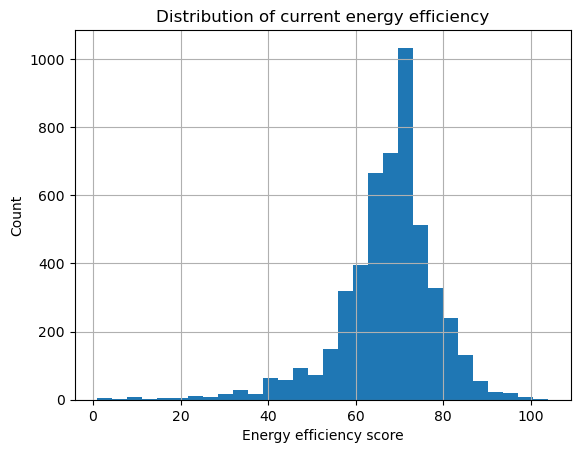

In [100]:
# Check distribution of target variable
gdf_sample["cur_ee"].hist(bins=30)
plt.xlabel("Energy efficiency score")
plt.ylabel("Count")
plt.title("Distribution of current energy efficiency")
plt.show()

In [101]:
gdf_sample["cur_ee"].describe()

count    5000.000000
mean       67.446000
std        11.308893
min         1.000000
25%        62.000000
50%        69.000000
75%        74.000000
max       104.000000
Name: cur_ee, dtype: float64

**Interpretation:** The EPC energy efficiency scores are defined on a scale from 0 to 100, where extremely low values are theoretically possible, but implausible. Outliers should be checked.

In [102]:
# Check plausibility of low-value cur_ee entries
gdf_sample[gdf_sample["cur_ee"] < 10][["cur_ee", "area", "age", "heat_d", "wall_d"]]

,cur_ee,area,age,heat_d,wall_d
13235,8.0,86.0,1930-1949,"room heaters, electric","cavity wall, as built, no insulation (assumed)"
4894,1.0,45.0,before 1900,"room heaters, electric","granite or whinstone, as built, no insulation ..."
4589,1.0,107.0,1900-1929,"boiler, radiators, electric","solid brick, as built, no insulation (assumed)"
20338,9.0,144.0,1967-1975,"boiler, radiators, lpg","cavity wall, as built, no insulation (assumed)"
29237,9.0,74.0,1900-1929,"room heaters, electric","solid brick, as built, no insulation (assumed)"
25915,6.0,70.0,before 1900,"boiler, radiators, lpg","granite or whinstone, as built, no insulation ..."
25591,1.0,68.0,1950-1966,"room heaters, mains gas","cavity wall, filled cavity"
2949,9.0,85.0,1930-1949,"boiler, radiators, anthracite","cavity wall, as built, no insulation (assumed)"
10012,7.0,80.0,1967-1975,portable electric heaters assumed for most rooms,"cavity wall, as built, no insulation (assumed)"
28265,5.0,159.0,1900-1929,no system present: electric heaters assumed,"solid brick, as built, no insulation (assumed)"


In [103]:
# Check plausibility of high-value cur_ee entries
gdf_sample[gdf_sample["cur_ee"] > 100][["cur_ee", "area", "age", "heat_d", "wall_d"]]

,cur_ee,area,age,heat_d,wall_d
14402,104.0,264.0,2012 onwards,"ground source heat pump, underfloor heating, e...",0.17 w/m2k


In [104]:
gdf_sample = gdf_sample[gdf_sample["cur_ee"] <= 100]

**Result:** Low-value outliers seem plausible. Therefore, only the impossibly high-value outlier was dropped.

In [105]:
# Sanity check: Are cur_rate and cur_ee checking out?
gdf_sample.groupby("cur_rate")["cur_ee"].mean().sort_index()

cur_rate
a    94.651163
b    84.252149
c    73.172490
d    62.982906
e    47.728767
f    30.988235
g    10.416667
Name: cur_ee, dtype: float64

**Interpretation:** The rates and score are checking out. The order is as expected.

count    4999.000000
mean       93.369074
std        63.122971
min         5.000000
25%        64.000000
50%        82.000000
75%       105.000000
max      2012.000000
Name: area, dtype: float64


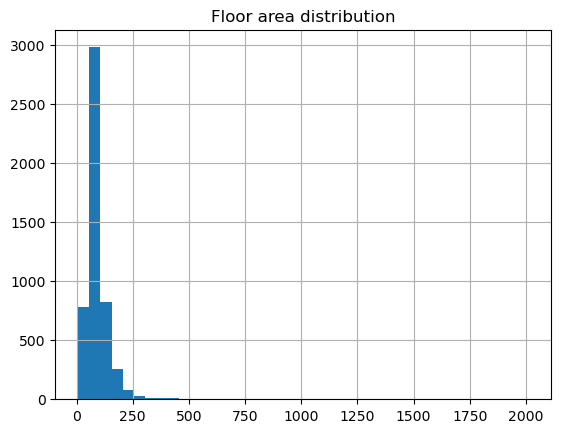

In [106]:
# Sanity check for area
print(gdf_sample.area.describe())
gdf_sample["area"].hist(bins=40)
plt.title("Floor area distribution")
plt.show()

**Interpretation:** For the most part, the area column is checking out. There are no negative values and some outliers regarding the size and the distribution is right skewed, but the distribution is reasonable. However, there are some extremely low and some extremely high values that need to be checked for plausibility.

In [107]:
# Check for very small areas
gdf_sample[gdf_sample["area"] < 20]

,cur_rate,cur_ee,per_ee,b_type,p_type,tenure,age,area,fuel,heat_d,g_type,floor_d,water_d,water_ee,wind_d,wind_ee,wall_d,wall_ee,roof_d,roof_ee,heat_ee,con_d,con_ee,light_ee,pv,sol_wat,year
11489,e,44.0,89.0,semi-detached,house,rented (social),1976-1982,5.0,mains gas,"boiler, radiators, mains gas","double glazing, unknown install date","solid, no insulation (assumed)","from main system,",good,full double glazing,average,"cavity wall, as built, partial insulation (ass...",average,"pitched, 150 mm loft insulation",good,good,programmer and room thermostat,average,very good,no,no,2024.0
22830,d,60.0,92.0,mid-terrace,house,owner-occupied,1950-1966,8.0,mains gas,"boiler, radiators, mains gas",double glazing installed before 2002,"solid, no insulation (assumed)","from main system, no cylinder thermostat",average,full double glazing,average,"cavity wall, filled cavity",average,"pitched, 200 mm loft insulation",good,good,"programmer, room thermostat and trvs",good,very good,no,no,2024.0


In [108]:
# Check for very large areas
gdf_sample[gdf_sample["area"] > 500]

,cur_rate,cur_ee,per_ee,b_type,p_type,tenure,age,area,fuel,heat_d,g_type,floor_d,water_d,water_ee,wind_d,wind_ee,wall_d,wall_ee,roof_d,roof_ee,heat_ee,con_d,con_ee,light_ee,pv,sol_wat,year
10784,e,45.0,73.0,detached,house,owner-occupied,before 1900,518.0,oil,"boiler, radiators, oil",double glazing installed during or after 2002,"solid, no insulation (assumed)","from main system,",average,partial double glazing,poor,"solid brick, as built, no insulation (assumed)",very poor,"pitched, no insulation (assumed)",very poor,average,programmer and at least two room thermostats,good,very good,no,no,2024.0
14329,d,57.0,71.0,detached,house,owner-occupied,1930-1949,908.0,oil,"boiler, underfloor heating, oil, boiler, under...",double glazing installed before 2002,"solid, no insulation (assumed)","from main system,",average,full double glazing,average,"solid brick, with external insulation",good,"pitched, 300 mm loft insulation",very good,poor,programmer and room thermostat,average,very good,no,no,2024.0
10399,e,44.0,67.0,detached,house,owner-occupied,1900-1929,723.0,oil,"boiler, radiators, oil","double glazing, unknown install date","solid, no insulation (assumed)","from main system,",average,full double glazing,average,"solid brick, as built, no insulation (assumed)",very poor,"pitched, 150 mm loft insulation",good,average,"programmer, room thermostat and trvs",good,very good,no,no,2024.0
12463,d,68.0,76.0,detached,house,owner-occupied,1983-1990,2012.0,mains gas,"boiler, radiators, mains gas",double glazing installed before 2002,"solid, no insulation (assumed)","from main system, no cylinder thermostat",average,full double glazing,average,"cavity wall, as built, insulated (assumed)",good,"flat, insulated (assumed)",average,good,"programmer, room thermostat and trvs",good,very good,no,no,2024.0
25889,c,77.0,81.0,detached,house,owner-occupied,1983-1990,564.0,wood pellets,"boiler, radiators, wood pellets","double glazing, unknown install date","suspended, insulated","from main system, plus solar",average,full double glazing,average,"cavity wall, as built, insulated (assumed)",good,"pitched, 400+ mm loft insulation",very good,poor,"programmer, room thermostat and trvs",good,very good,no,yes,2024.0
9687,c,77.0,80.0,detached,house,owner-occupied,2003-2006,513.0,mains gas,"boiler, underfloor heating, mains gas",double glazing installed during or after 2002,"suspended, insulated (assumed)","from main system,",good,full double glazing,good,"cavity wall, as built, insulated (assumed)",good,"pitched, insulated (assumed)",good,good,time and temperature zone control,very good,average,no,no,2024.0
10185,c,73.0,77.0,detached,house,owner-occupied,2003-2006,532.0,mains gas,"boiler, underfloor heating, mains gas, boiler,...",double glazing installed during or after 2002,"solid, insulated (assumed)","from main system,",good,full double glazing,good,"cavity wall, as built, insulated (assumed)",good,"pitched, 250 mm loft insulation",good,good,time and temperature zone control,very good,poor,no,no,2024.0
22239,d,64.0,80.0,mid-terrace,house,owner-occupied,before 1900,657.0,mains gas,"boiler, radiators, mains gas",secondary glazing,"solid, no insulation (assumed)","from main system,",good,some secondary glazing,poor,"solid brick, as built, no insulation (assumed)",very poor,"pitched, 250 mm loft insulation",good,good,time and temperature zone control,very good,good,no,no,2024.0
22405,b,81.0,86.0,detached,house,rented (private),1996-2002,887.0,mains gas,"boiler, underfloor heating, mains gas, boiler,...",double glazing installed during or after 2002,"solid, limited insulation (assumed)","from main system,",good,full double glazing,good,"cavity wall, as built, insulated (assumed)",good,"flat, insulated (assumed)",average,good,time and temperature zone control,very good,very good,no,no,2024.0
11955,c,79.0,79.0,detached,house,owner-occupied,2007-2011,1476.0,mains gas,"boiler, underfloor heating, mains gas",double glazing installed during or after 2002,"solid, insula

In [109]:
gdf_sample = gdf_sample[gdf_sample["area"] >= 20]
gdf_sample = gdf_sample[gdf_sample["area"] <= 1000]
gdf_sample["area"] = gdf_sample["area"].clip(upper=500)

**Result:** Rows with extremely low area seemed to be implausible, therefore they were dropped. Rows with extremely high area were theoretically possible, but those with area > 1000 could be entry errors. In any case, they would influence the model negatively and were therefore dropped. Rows with area between 500 and 1000 were clipped to the upper boundary of 500 to reduce the influence of rate outliers.

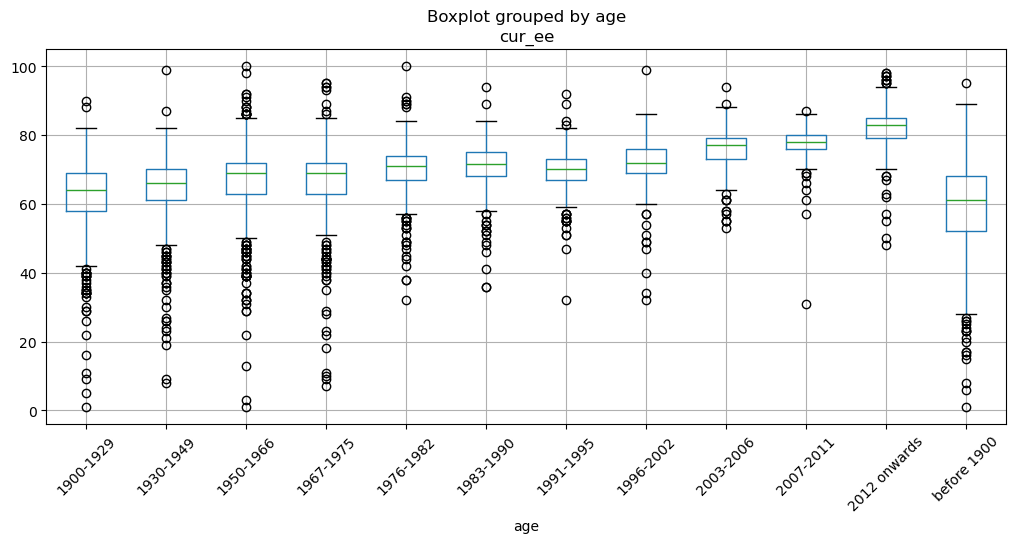

In [110]:
# Check for trend in cur_ee by age
gdf_sample.boxplot(column="cur_ee", by="age", figsize=(12,5))
plt.xticks(rotation=45)
plt.show()

**Interpretation:** The trend in energy efficiency checks out. It is expected that newer buildings tend to have higher efficiency scores, which is displayed in the plot.

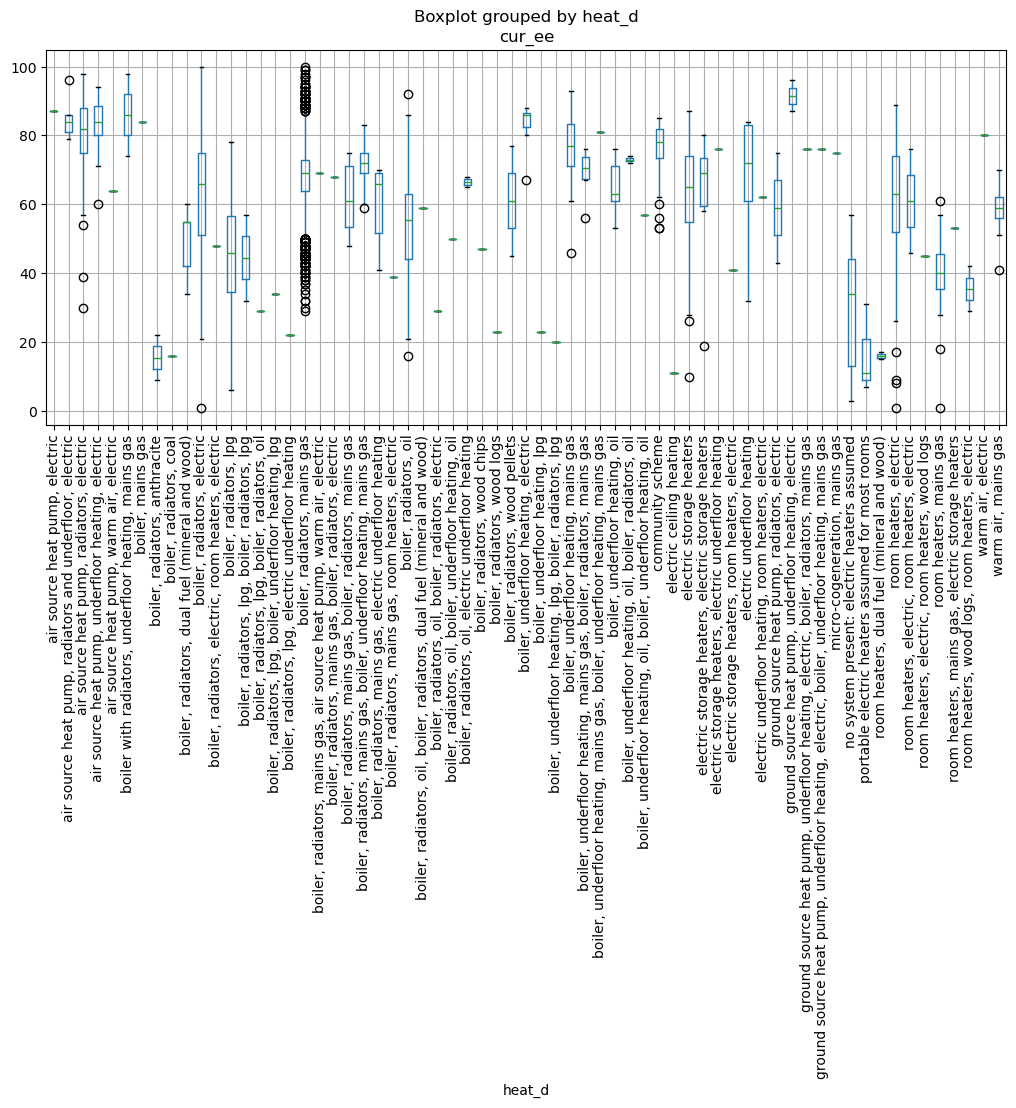

In [111]:
# Check for cur_ee by heat_d
gdf_sample.boxplot(column="cur_ee", by="heat_d", figsize=(12,5))
plt.xticks(rotation=90)
plt.show()

**Interpretation**: The trend in energy efficiency checks out. It is expected that newer heating systems (i.e. heat pumps) are more efficient than older systems like boilers, which the plot displayes.

In [112]:
# Save cleaned data to csv
gdf_sample.to_csv("epc_dom_cleaned_sample.csv", index=False)